# Bank Customer Churn Prediction Project

## Made by Gaurang Sonkavde

### Import dataset

pandas: Data manipulation and analysis library.

numpy: Numerical computing library.

matplotlib: Plotting library for creating visualizations.

seaborn: Statistical data visualization library.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [2]:
df1 = pd.read_csv(r'C:\Users\Admin\Desktop\Datasets\Churn_Modelling.csv')

In [3]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df1.shape

(10000, 14)

### Exploring Dataset and Preprocessing

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [7]:
print(df1["Geography"].unique())
print(df1["Gender"].unique())
print(df1['NumOfProducts'].unique())
print(df1["HasCrCard"].unique())
print(df1["Exited"].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]


In [8]:
df = df1[['CreditScore', 'Geography','Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']]
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

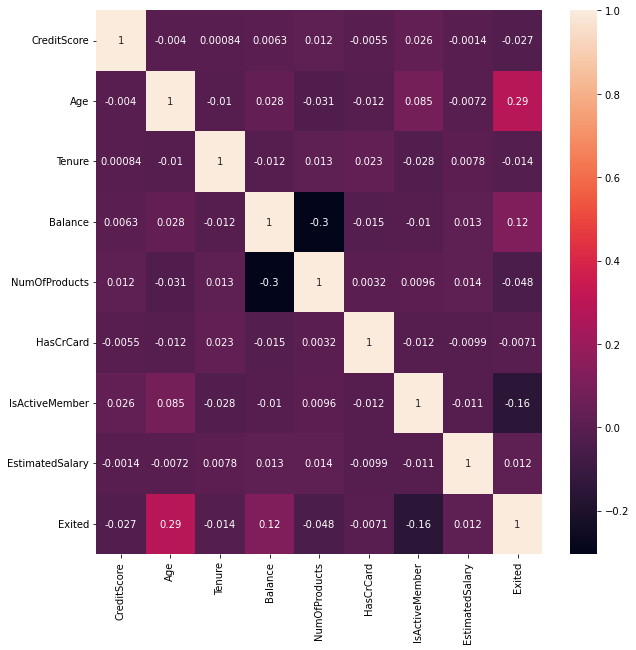

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
#Converting the categorical variables into numerical and avoiding Dummy Variable Trap
df = pd.get_dummies(df, drop_first=True)

## Exploratory Data Analysis

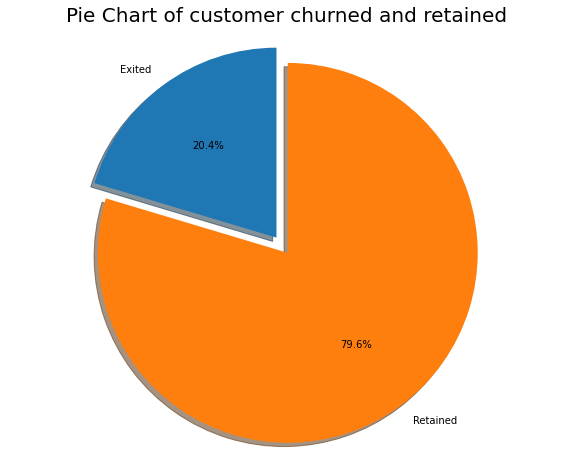

In [11]:
labels = 'Exited', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Pie Chart of customer churned and retained", size = 20)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Geography', ylabel='count'>

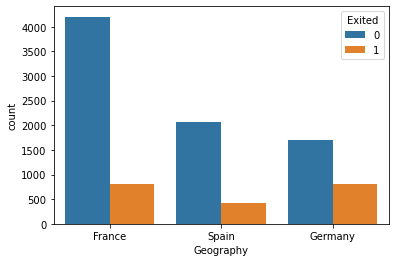

In [12]:
sns.countplot(df.Geography,hue=df.Exited)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

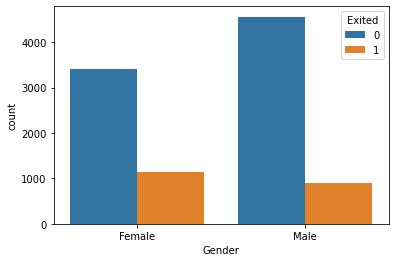

In [13]:
sns.countplot(df.Gender,hue=df.Exited)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tenure', ylabel='count'>

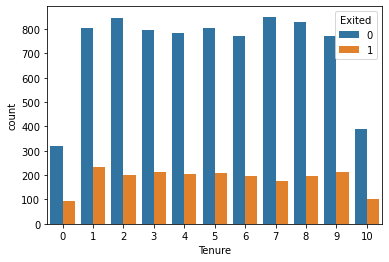

In [14]:
sns.countplot(df.Tenure,hue=df.Exited)

In [15]:
df.CreditScore.nunique()

460

In [16]:
df.NumOfProducts.nunique()

4

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

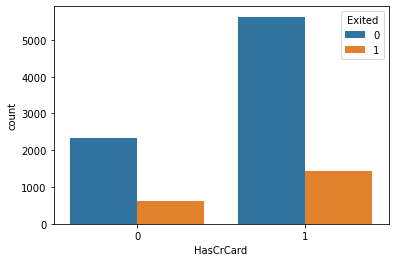

In [17]:
sns.countplot(df.HasCrCard,hue=df.Exited)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='Balance'>

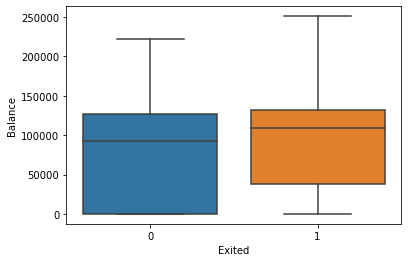

In [18]:
sns.boxplot(df['Exited'],df['Balance'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

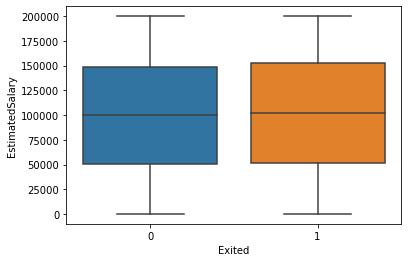

In [19]:
sns.boxplot(df['Exited'],df['EstimatedSalary'])

### To check whether data is balanced or not

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

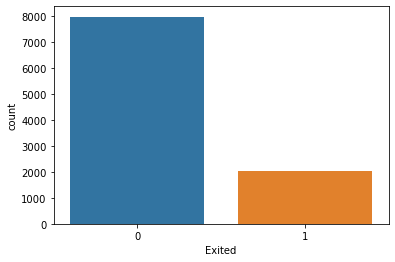

In [20]:
sns.countplot(df['Exited'])

In [21]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## Sampling Techniques

#### Undersampling 

It is a technique used to address imbalanced datasets by reducing the number of instances in the majority class. It aims to balance the class distribution by randomly removing instances from the majority class, which can help prevent the model from being biased towards the majority class.

#### Oversampling

It is a technique used to address imbalanced datasets by increasing the number of instances in the minority class. It aims to ensure that the model has enough data from the minority class to learn meaningful patterns by duplicating existing instances or generating synthetic instances.

## Under Sampling

In [23]:
count_class_0,count_class_1 = df.Exited.value_counts()
df_class_0 = df[df['Exited']==0]
df_class_1 = df[df['Exited']==1]

In [24]:
df_class_0.shape

(7963, 12)

In [25]:
df_class_1.shape

(2037, 12)

In [26]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)
df_test_under.shape

(4074, 12)

In [27]:
print('Random under-sampling')
print(df_test_under.Exited.value_counts())

Random under-sampling
0    2037
1    2037
Name: Exited, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

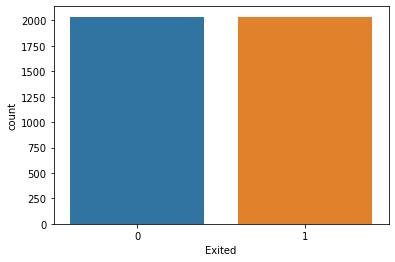

In [28]:
sns.countplot(df_test_under.Exited)

In [29]:
df_test_under.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
8283,664,57,1,0.00,2,1,1,56562.57,0,0,0,1
5845,530,33,9,75242.28,1,0,1,101694.67,0,1,0,1
7444,742,29,4,0.00,2,1,1,180066.59,0,0,0,0
9247,786,29,7,80895.44,2,1,0,64945.57,0,0,1,1
1846,485,30,7,0.00,1,1,0,107067.37,0,0,1,0


## Feature Spliting

### X = Independent Variable

### y = Dependent Variable

In [31]:
x = df_test_under.drop('Exited',axis='columns')
y = df_test_under['Exited']

## Train-Test Split

### X_train: 

The training dataset containing input features or independent variables used to train a machine learning model.

### X_test: 

The testing dataset containing input features or independent variables used to evaluate the performance of a trained machine learning model.

### y_train: 

The target variable or dependent variable corresponding to the training dataset, used for training the model.

### y_test: 

The target variable or dependent variable corresponding to the testing dataset, used to assess the performance and make predictions using a trained machine learning model.

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [33]:
# Standard SCaling the Dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

# Checking with various Clustering Algorithm to check which works best

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [37]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [38]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [39]:
scores

[0.6797546012269938,
 0.7177914110429447,
 0.7079754601226994,
 0.7460122699386503,
 0.7030674846625767,
 0.7619631901840491,
 0.7190184049079754,
 0.7079754601226994]

In [40]:
df1 = pd.DataFrame()
df1['Names'] = names
df1['Score'] = scores
df1

,Names,Score
0,Nearest Neighbors,0.679755
1,Linear SVM,0.717791
2,Gradient_Boosting,0.707975
3,Decision Tree,0.746012
4,Random Forest,0.703067
5,AdaBoost,0.761963
6,Naive Bayes,0.719018
7,Logistic_Regression,0.707975


In [41]:
cm = sns.light_palette('green',as_cmap=True)
s = df1.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.679755
1,Linear SVM,0.717791
2,Gradient_Boosting,0.707975
3,Decision Tree,0.746012
4,Random Forest,0.703067
5,AdaBoost,0.761963
6,Naive Bayes,0.719018
7,Logistic_Regression,0.707975


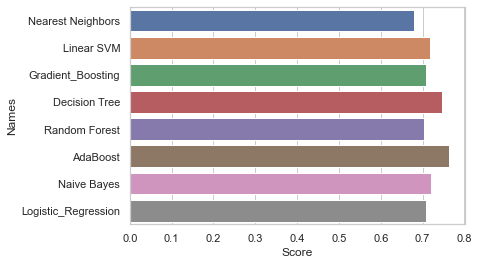

In [42]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df1)

## Ada-Boost Algorithm (Adaptive Boost Algorithm)


1) Works sequentially by training a series of weak classifiers in multiple iterations.

2) Adjusts the weights of training samples based on previous classification performance.

3) Focuses more on misclassified or high-weight samples in subsequent iterations.

4) Uses simple models like decision stumps or shallow decision trees as weak classifiers.

5) Combines predictions of weak classifiers using weighted voting or averaging.

In [43]:
classifier = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0, random_state=1)

In [44]:
classifier.fit(x_train,y_train)

AdaBoostClassifier(n_estimators=100, random_state=1)

In [45]:
y_pred = classifier.predict(x_test)

### Classification Report

Provides a comprehensive evaluation of a classification model's performance.

Summarizes key metrics such as precision, recall, F1-score, and support for each class.

1) Precision: Measures the accuracy of positive predictions, indicating how many predicted positives are actually positive.

2) Recall: Measures the proportion of actual positives that are correctly identified.

3) F1-score: Harmonic mean of precision and recall, providing a balanced measure of a model's performance.

4) Support: Represents the number of instances in each class in the dataset.

In [46]:
from sklearn.metrics import classification_report,roc_auc_score,roc_curve,auc
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.76      0.77      0.76       408
           1       0.76      0.76      0.76       407

    accuracy                           0.76       815
   macro avg       0.76      0.76      0.76       815
weighted avg       0.76      0.76      0.76       815



In [47]:
roc_auc_score(y_test,y_pred)

0.7619568097509274

### AUC-ROC Curve

The ROC AUC (Receiver Operating Characteristic Area Under the Curve) is a graphical measure of a binary classification model's performance.

It shows the relationship between the true positive rate (sensitivity) and the false positive rate as the classification threshold varies.

The true positive rate represents the proportion of actual positives correctly identified, while the false positive rate is the proportion of actual negatives incorrectly classified as positives.

The ROC curve is created by plotting the true positive rate against the false positive rate for different threshold values.

The AUC value ranges from 0 to 1, where a higher value indicates better model performance in terms of its ability to distinguish between positive and negative instances.

In [48]:
fpr,tpr,threshold =roc_curve(y_test,y_pred)
auc = auc(fpr,tpr)

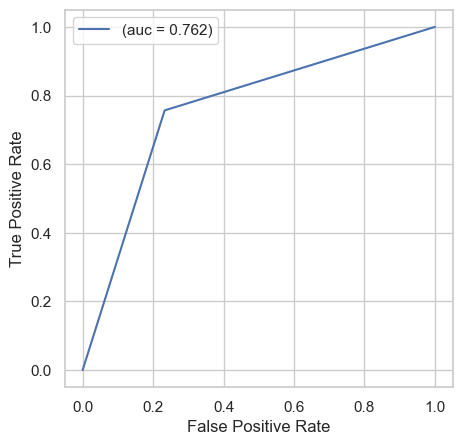

In [49]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Oversampling Technique

In [50]:
count_class_0,count_class_1

(7963, 2037)

In [51]:
df_class_1_over = df_class_1.sample(count_class_0,replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
print("Random Over-Sampling")
print(df_test_over.Exited.value_counts())

Random Over-Sampling
0    7963
1    7963
Name: Exited, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

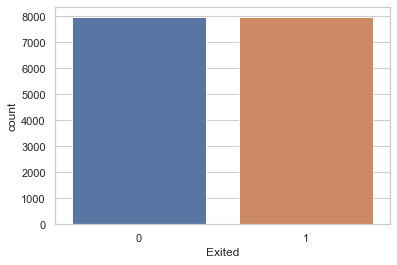

In [52]:
sns.countplot(df_test_over.Exited)

In [53]:
df_test_over.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
6,822,50,7,0.00,2,1,1,10062.80,0,0,0,1
8,501,44,4,142051.07,2,0,1,74940.50,0,0,0,1


In [54]:
x = df_test_over.drop('Exited',axis='columns')
y = df_test_over['Exited']

In [55]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=123,stratify=y)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [57]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [58]:
names = [
    "Nearest Neighbors",
    "Linear SVM",
    "Gradient_Boosting",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "Logistic_Regression",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    GradientBoostingClassifier(n_estimators=100,learning_rate=1.0),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier(n_estimators=100),
    GaussianNB(),
    LogisticRegression()
]

In [59]:
scores = []
for name, clf in zip(names,classifiers):
  clf.fit(x_train,y_train)
  score = clf.score(x_test,y_test)
  scores.append(score)

In [60]:
scores

[0.8568738229755178,
 0.704331450094162,
 0.8000627746390458,
 0.7623979912115505,
 0.7504708097928436,
 0.7715003138731952,
 0.7037037037037037,
 0.699623352165725]

In [61]:
df2 = pd.DataFrame()
df2['Names'] = names
df2['Score'] = scores
df2

,Names,Score
0,Nearest Neighbors,0.856874
1,Linear SVM,0.704331
2,Gradient_Boosting,0.800063
3,Decision Tree,0.762398
4,Random Forest,0.750471
5,AdaBoost,0.771500
6,Naive Bayes,0.703704
7,Logistic_Regression,0.699623


In [62]:
cm = sns.light_palette('green',as_cmap=True)
s = df2.style.background_gradient(cmap=cm)
s

,Names,Score
0,Nearest Neighbors,0.856874
1,Linear SVM,0.704331
2,Gradient_Boosting,0.800063
3,Decision Tree,0.762398
4,Random Forest,0.750471
5,AdaBoost,0.771500
6,Naive Bayes,0.703704
7,Logistic_Regression,0.699623


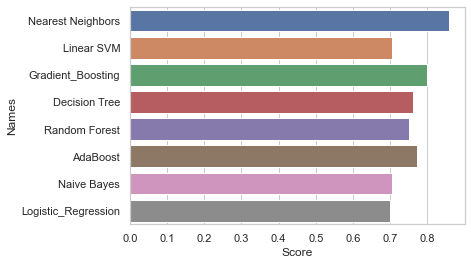

In [63]:
sns.set(style="whitegrid")
ax = sns.barplot(y ='Names',x = 'Score',data = df2)

# KNN Algorithm ( K-Nearest Neighbour Algorithm)

KNN is a algorithm for classification and regression tasks in this usecase we are use classification technique.

It finds the K nearest neighbors to a new data point based on a distance metric.

KNN algorithm uses distance metrics such as Euclidean distance, Manhattan distance, or Minkowski distance to measure the similarity between data points.

KNN can be used in customer churn prediction by training it on historical data to predict if a new customer is likely to churn or not.

It is flexible and can handle different data types, but requires proper tuning and preprocessing for optimal performance.

In [73]:
classifier2 = KNeighborsClassifier(n_neighbors=5,weights='uniform',algorithm='auto',metric='euclidean')

In [74]:
classifier2.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [75]:
y_predicted = classifier2.predict(x_test)

In [76]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      1593
           1       0.77      0.89      0.83      1593

    accuracy                           0.81      3186
   macro avg       0.82      0.81      0.81      3186
weighted avg       0.82      0.81      0.81      3186



In [77]:
from sklearn.metrics import roc_auc_score,roc_curve,auc

In [78]:
roc_auc_score(y_test,y_predicted)

0.8126177024482109

In [79]:
fpr,tpr,threshold =roc_curve(y_test,y_predicted)
auc = auc(fpr,tpr)

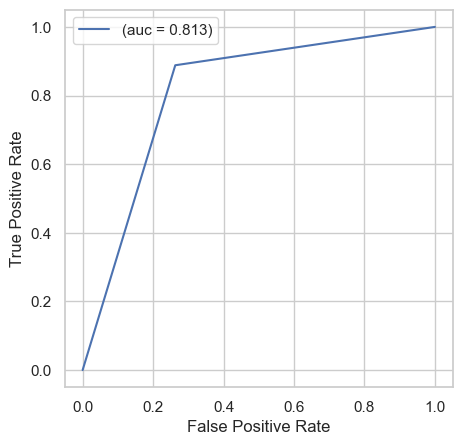

In [80]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(fpr,tpr,linestyle='-',label = "(auc = %0.3f)" % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [72]:
#pickle the model
import pickle
file = open('Customer_Churn_Prediction1.pkl', 'wb')
pickle.dump(rf, file)